In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from masterthesis.utils import (
    heatmap, CEFR_LABELS, LANG_LABELS, load_split, IMG_DIR, MODEL_DIR, iso639_3, rescale_regression_results
)
from masterthesis.held_out_eval import load_model_and_w2i, get_input_reps
from masterthesis.models.report import report

import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.
 27%|██▋       | 33/123 [00:00<00:00, 328.67it/s]

Preprocessing split 'test' ...


100%|██████████| 123/123 [00:00<00:00, 413.39it/s]


In [9]:
model_path = MODEL_DIR / "rnn-multi-26805083_3_model.h5"

In [4]:
data = load_split("test", round_cefr=False)
data["isolang"] = data["lang"].replace(iso639_3)
lang_targets = np.array(
    [LANG_LABELS.index(c) for c in data["isolang"]], dtype=int
)
cefr_targets = np.array(
    [CEFR_LABELS.index(c) for c in data["cefr"]], dtype=int
)

In [10]:
model, w2i = load_model_and_w2i(model_path)

In [11]:
multi_input = isinstance(model.input, list) and len(model.input) == 2

x = get_input_reps(w2i, multi_input)
predictions = model.predict(x)

100%|██████████| 123/123 [00:00<00:00, 1958.91it/s]

Preprocessing split 'test' ...


In [12]:
lang_predictions = predictions[1]
lang_pred = np.argmax(lang_predictions, axis=1)

cefr_predictions = predictions[0]
cefr_pred = rescale_regression_results(cefr_predictions, highest_class=6)

             precision    recall  f1-score   support

        eng       0.15      0.50      0.24         8
        pol       0.40      0.18      0.25        22
        rus       0.50      0.25      0.33        16
        som       0.50      0.31      0.38        13
        spa       0.20      0.59      0.30        17
        deu       1.00      0.27      0.43        22
        vie       0.67      0.40      0.50        25

avg / total       0.54      0.34      0.36       123

Macro F1: 0.347
Micro F1: 0.341
Weighted F1: 0.363
== Confusion matrix ==
[[ 4  1  0  0  3  0  0]
 [ 6  4  1  0 11  0  0]
 [ 0  0  4  0  9  0  3]
 [ 0  1  0  4  6  0  2]
 [ 4  1  1  1 10  0  0]
 [11  2  0  0  3  6  0]
 [ 1  1  2  3  8  0 10]]
             precision    recall  f1-score   support

         A2       0.50      0.33      0.40         3
      A2/B1       0.47      0.47      0.47        19
         B1       0.42      0.43      0.43        23
      B1/B2       0.32      0.32      0.32        22
         B2

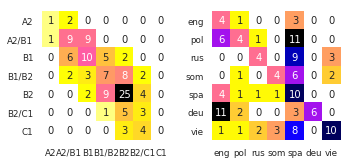

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

report(lang_targets, lang_pred, LANG_LABELS, ax=ax2)
report(cefr_targets, cefr_pred, CEFR_LABELS, ax=ax1)
fig.set_size_inches(5, 2.5)
fig.tight_layout()
#plt.savefig(str(IMG_DIR / "multi-test-cm.pdf"), bbox_inches="tight")